# COMP5318 - Machine Learning and Data Mining: Assignment 1
<div style="text-align: right"> Due: Wednesday 14 Oct 2020 11:59PM </div>

The goal of this assignment is to build a classifier to classify some grayscale images of the size 28x28 into a set of categories. The dimension of the original data is large, so you need to be smart on which method you gonna use and perhaps perform a pre-processing step to reduce the amount of computation. Part of your marks will be a function of the performance of your classifier on the test set.

In [71]:
import h5py
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

print(os.listdir("./Input/train"))

ModuleNotFoundError: No module named 'linalg'

In [2]:
with h5py.File('./Input/train/images_training.h5','r') as H:
    data_train = np.copy(H['datatrain'])
with h5py.File('./Input/train/labels_training.h5','r') as H:
    label_train = np.copy(H['labeltrain'])

# using H['datatest'], H['labeltest'] for test dataset.
print(data_train.shape,label_train.shape)

(30000, 784) (30000,)


In [3]:
with h5py.File('./Input/test/images_testing.h5','r') as H:
    data_test = np.copy(H['datatest'])
with h5py.File('./Input/test/labels_testing_2000.h5','r') as H:
    label_test = np.copy(H['labeltest'])

# using H['datatest'], H['labeltest'] for test dataset.
print(data_test.shape,label_test.shape)

(5000, 784) (2000,)


Showing a sample data. The first example belongs to class 0: T-Shirt/Top

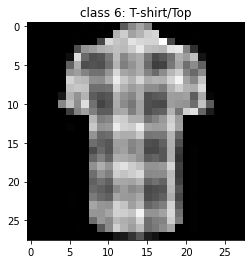

In [4]:
# import matplotlib.pyplot as plt
# data_train = data_train.reshape((data_train.shape[0], 28, 28))
# plt.imshow(data_train[0], cmap=plt.get_cmap('gray'))
# plt.title("class " + str(label_train[0]) + ": T-shirt/Top" )
# plt.show()

In [4]:
# def PCA(n_components, data):
#     """
#     Principal Component Analysis
    
#     Parameters: 
    
#     n_components: int
#         Number of principal components to use
        
#     data : array-like, shape = (n_samples, n_features)
#         Data to perform PCA on
    
#     """
#     n_components = n_components
#     data = data
#     X = data - np.mean(data, axis=0) # data matrix normalized by mean
#     S = np.cov(X.T) # compute covariance matrix of X
#     L, V = np.linalg.eig(S) # L - array of eigenvalues; V - matrix of eigenvectors
#     V = V[:,np.argsort(-L)][:,:n_components] # sort eigenvectors by descending order on eigenvalues
#     L = -np.sort(-L)[:n_components] # sort eigenvalues by descending order
#     X_PCA = V.T @ X.T
#     X_PCA = X_PCA.T
#     return X_PCA

[[1.05083768e-07 7.27378945e-08 7.30345082e-08 ... 9.55063649e-08
  7.91855298e-08 8.53459848e-08]
 [7.27378945e-08 9.66920586e-07 1.16265157e-06 ... 1.31888107e-06
  7.88345736e-07 1.77124934e-07]
 [7.30345082e-08 1.16265157e-06 3.97895966e-06 ... 3.18729168e-06
  5.49468245e-07 1.06644829e-07]
 ...
 [9.55063649e-08 1.31888107e-06 3.18729168e-06 ... 4.59293547e-03
  1.53244343e-03 1.34933325e-04]
 [7.91855298e-08 7.88345736e-07 5.49468245e-07 ... 1.53244343e-03
  1.23425948e-03 1.49273657e-04]
 [8.53459848e-08 1.77124934e-07 1.06644829e-07 ... 1.34933325e-04
  1.49273657e-04 7.11270596e-05]]
[29.077053310731294, 17.72924699012503, 6.013928330120427, 4.936655363514209, 3.8278512994969107, 3.4506048031981504, 2.3597744497586266, 1.876140819639972, 1.3555828542550032, 1.309762764368793, 0.986247442813638, 0.9109813631941975, 0.7676520274675228, 0.6579865468252284, 0.6075033144694078, 0.5889784249457763, 0.5558043304416028, 0.5310969638898528, 0.46149293588082124, 0.4564381199172578]
[29.

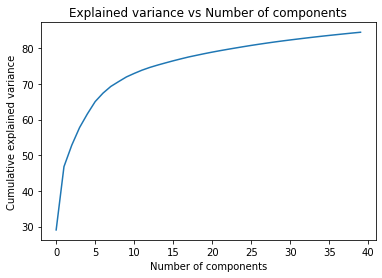

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
#data = np.append(flat(data_train), flat(data_test))
data = data_train
data = data - np.mean(data, axis=0)
covariance_matrix = np.cov(data.T)
print(covariance_matrix)
eig_val, eig_vec = np.linalg.eig(covariance_matrix)

variance_explained = []
for i in eig_val:
    variance_explained.append((i/sum(eig_val))*100)      
print(variance_explained[:20])
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained[:20])
sns.lineplot(x = np.arange(40), y=cumulative_variance_explained[:40])
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")

projection_matrix = (eig_vec.T[:][:40]).T
X_pca = data.dot(projection_matrix)
X_train_pca = X_pca
#X_test_pca = data_test.dot(projection_matrix)


data = data_test
data = data - np.mean(data, axis=0)
X_test_pca = data.dot(projection_matrix)

print(X_train_pca.shape)
print(X_test_pca.shape)
#X_train_pca = eig_vec.T[:][:40]

#X_train_pca = X_pca[:data_train.shape[0]]
#X_test_pca = X_pca[-data_test.shape[0]:]
#print(X_train_pca.shape)
#print(X_test_pca.shape)

In [90]:
n_components = 40
n_samples = data_train.shape[0]
data = data_train - np.mean(data_train, axis=0) #zero center data
U, S_t, V = np.linalg.svd(data, full_matrices=False)
components = V

# Get variance explained by singular values
explained_variance = (S ** 2) / (n_samples - 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
singular_values = S.copy()  # Store the singular values.

components_ = components[:n_components]
explained_variance = explained_variance[:n_components]
explained_variance_ratio = explained_variance_ratio[:n_components]
singular_values = singular_values[:n_components]

U = U[:, :n_components]
U *= S[:n_components]
X_train_pca = U

data = data_test - np.mean(data_test, axis=0) #zero center data
U, S, V = np.linalg.svd(data, full_matrices=False)
U = U[:, :n_components]
X_test_pca = U*S_t[:n_components]
print(X_train_pca.shape)
print(X_test_pca.shape)
print(U)
#return U, S, V

(30000, 40)
(5000, 40)
[[ 0.01865504  0.00881772 -0.00748004 ... -0.02095225  0.02532523
  -0.00562491]
 [-0.00535735 -0.02072059 -0.00300231 ... -0.0244806  -0.00028822
  -0.0001643 ]
 [ 0.00634587  0.02502874 -0.01330161 ...  0.00770298 -0.01346243
   0.01202108]
 ...
 [-0.0187302  -0.00131458  0.00512391 ...  0.00718678  0.01327695
  -0.03718266]
 [ 0.00352821  0.01251804  0.0042512  ... -0.00468706  0.00557526
   0.00277413]
 [ 0.00201521  0.01633281  0.00360622 ... -0.02041297  0.00353851
  -0.01836467]]


In [48]:
X = check_array(X)
        if self.mean_ is not None:
            X = X - self.mean_
        X_transformed = np.dot(X, self.components_.T)
        if self.whiten:
            X_transformed /= np.sqrt(self.explained_variance_)
        return X_transformed

(35000, 784)

In [16]:

# n_components = 40
# X_train_pca = PCA(n_components, data_train)
# xtrain_pca.shape
# X_test_pca = PCA(n_components, data_test)

In [64]:
# from sklearn.decomposition import PCA
# n_components = 100
# pca = PCA(n_components=n_components, svd_solver="full")
# #pca.fit(d2_data_train)

# X_train_pca = pca.fit_transform(data_train)
# print(pca.explained_variance_ratio_)
# X_test_pca = pca.fit_transform(data_test)
# print(pca.explained_variance_ratio_)

# #print(pca.singular_values_)
# len(X_train_pca)

[0.29077056 0.17729232 0.06013924 0.04936654 0.03827854 0.034506
 0.02359772 0.01876142 0.01355582 0.01309763 0.00986248 0.00910981
 0.00767653 0.00657987 0.00607504 0.00588979 0.00555804 0.00531097
 0.00461493 0.00456438 0.00430874 0.00405317 0.00385287 0.00371654
 0.00363843 0.0035357  0.0033338  0.00320463 0.00308857 0.00290794
 0.00277894 0.00267885 0.00263312 0.00255214 0.00247383 0.00236587
 0.00230014 0.00225125 0.00219468 0.00211174 0.0020149  0.0019581
 0.00192782 0.00182938 0.00174134 0.00172355 0.00168008 0.00165527
 0.00161192 0.00155493 0.00153694 0.00151135 0.00147363 0.00143209
 0.00137588 0.00136381 0.00131263 0.00128635 0.00127224 0.00125268
 0.00122533 0.00120101 0.00118518 0.00116583 0.00115325 0.00112762
 0.00111305 0.00110361 0.00106089 0.00105437 0.0010317  0.0010083
 0.00098745 0.00096578 0.00094431 0.00093239 0.00092853 0.00090147
 0.00089694 0.0008799  0.00086895 0.00084215 0.00083253 0.00081648
 0.00081039 0.00079961 0.00078464 0.0007718  0.00076433 0.00076186

30000

In [66]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
k = 10 # number of folds for cv
indices_cv = KFold(n_splits=10, random_state=None, shuffle=False) # indices for the k-folds
score_list_PCA = []
n_comp_list = np.arange(8, 15)
for K in n_comp_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    score = 0
    count = 1
    for train_index, test_index in indices_cv.split(X_train_pca):
        print("comp", K, " fold", count)
        count+=1
        test_id = test_index
        train_id = train_index
        y_true = label_train[test_id]
        model = knn.fit(X_train_pca[train_id], label_train[train_id])
        score += model.score(X_train_pca[test_index], label_train[test_id])
    score_list_PCA.append(score/k)
score_list_PCA = np.array(score_list_PCA)


comp 8  fold 1
comp 8  fold 2
comp 8  fold 3
comp 8  fold 4
comp 8  fold 5
comp 8  fold 6
comp 8  fold 7
comp 8  fold 8
comp 8  fold 9
comp 8  fold 10
comp 9  fold 1
comp 9  fold 2
comp 9  fold 3
comp 9  fold 4
comp 9  fold 5
comp 9  fold 6
comp 9  fold 7
comp 9  fold 8
comp 9  fold 9
comp 9  fold 10
comp 10  fold 1
comp 10  fold 2
comp 10  fold 3
comp 10  fold 4
comp 10  fold 5
comp 10  fold 6
comp 10  fold 7
comp 10  fold 8
comp 10  fold 9
comp 10  fold 10
comp 11  fold 1
comp 11  fold 2
comp 11  fold 3
comp 11  fold 4
comp 11  fold 5
comp 11  fold 6
comp 11  fold 7
comp 11  fold 8
comp 11  fold 9
comp 11  fold 10
comp 12  fold 1
comp 12  fold 2
comp 12  fold 3
comp 12  fold 4
comp 12  fold 5
comp 12  fold 6
comp 12  fold 7
comp 12  fold 8
comp 12  fold 9
comp 12  fold 10
comp 13  fold 1
comp 13  fold 2
comp 13  fold 3
comp 13  fold 4
comp 13  fold 5
comp 13  fold 6
comp 13  fold 7
comp 13  fold 8
comp 13  fold 9
comp 13  fold 10
comp 14  fold 1
comp 14  fold 2
comp 14  fold 3
comp 1

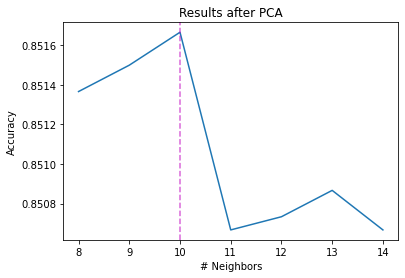

In [67]:
fig, ax = plt.subplots()
n_comp_list = np.arange(8, 15)
ax.plot(n_comp_list, score_list_PCA)
ax.axvline(n_comp_list[np.argmax(score_list_PCA)], c='m', linestyle='--', alpha=0.6)
ax.set_xlabel('# Neighbors')
ax.set_ylabel('Accuracy')
ax.set_xticks(n_comp_list)
ax.set_title('Results after PCA')
plt.show()

In [94]:
%%time
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

y_true = label_test
knn = KNeighborsClassifier(n_neighbors=np.argmax(score_list_PCA), algorithm="kd_tree")
knn.fit(X_train_pca, label_train)
y_pred = knn.predict(X_test_pca)
print(knn.score(X_test_pca[:2000], label_test))


0.819
CPU times: user 3.65 s, sys: 104 ms, total: 3.76 s
Wall time: 5.72 s


In [95]:
y_true = np.array(y_true)
print(y_true[:10])
y_pred = np.array(y_pred)
print(y_pred[:10])
np.sum(y_true == y_pred[:2000])/len(y_true)

[1 8 1 8 4 0 4 5 3 1]
[1 8 1 8 4 0 6 9 3 1]


0.819